# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.5/38.8 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.8 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.9/38.8 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.8 MB 8.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.2/38.8 MB 9.2 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.8 MB 9.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.8 MB 10.0 MB/s eta 0:00:04
   ----- ----------


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 16119 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [8]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


#Visualising and Performing Prediction on Single image

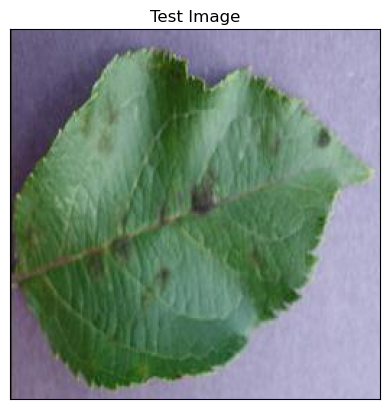

In [10]:
#Test Image Visualization
import cv2
image_path = 'valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [15]:
print(predictions)

[[9.3317491e-01 5.3604976e-03 6.6491298e-06 1.2196026e-02 1.0652471e-05
  4.4006301e-05 2.0311496e-07 1.6263451e-08 3.3372683e-07 1.1218277e-06
  7.0172001e-07 5.0240232e-07 7.0352246e-07 7.5282838e-07 2.8783951e-03
  8.4343710e-06 7.6784963e-05 2.5799278e-07 1.1892565e-05 9.4059505e-05
  6.6321710e-04 4.3615300e-02 2.7900360e-05 1.7508312e-06 4.4166888e-04
  5.6021709e-05 8.8968533e-05 6.0968276e-04 3.1321953e-05 3.9270669e-04
  1.5685146e-06 2.3872908e-05 1.4514015e-04 1.1293482e-08 3.3252149e-05
  1.1887485e-07 6.4360137e-08 4.6417406e-07]]


In [17]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


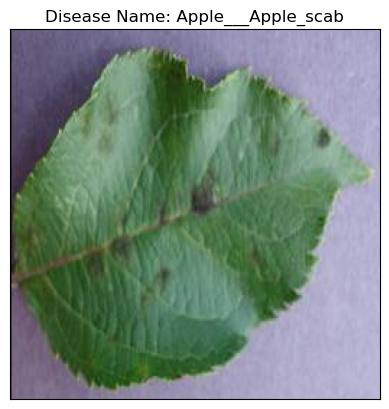

In [20]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()